In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import networkx as nx
import os
#import nxviz as nv
os.getcwd()

'C:\\Users\\sumith.singh\\A_SUBEX'

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
# Command Prompt Commands
# pip install igraph
# pip install nxviz
#Jupyter Commands
# !pip install igraph
# !pip list
#!pip install nxviz
n = 20
nodes = list(range(1,n))
nodes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [5]:
G = nx.Graph()
G.add_nodes_from(nodes)
edge_prob = np.random.random()
G.add_edge(1,2)

In [6]:
# Edge Creation
for i in nodes:
    for j in nodes:
        if i < j :
            edge_prob = np.random.random()
            #print(i,j,edge_prob)
            if edge_prob > 0.5 :
                G.add_edge(i,j)
    

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:15

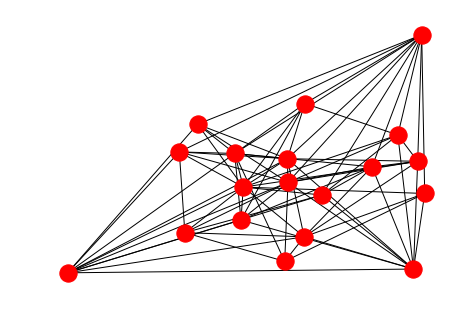

In [7]:
nx.draw(G)
plt.show()

In [8]:
# Graph Properties
#print('Edges -- ')
#print(G.edges())
#print('Neighbors--')
#print(G.neighbors(1))
#print('Degree Centrality')
#print(nx.degree_centrality(G))
#print('Graph')
#print(G)

In [10]:
from random import randrange
from datetime import timedelta
import datetime

def random_date(start, end):
    """
    This function will return a random datetime between two datetime 
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return start + timedelta(seconds=random_second)

In [12]:
d1A = datetime.datetime.strptime('1/1/2016 1:30 PM', '%m/%d/%Y %I:%M %p')
d2A = datetime.datetime.strptime('1/13/2016 4:50 AM', '%m/%d/%Y %I:%M %p')
d1B = datetime.datetime.strptime('3/1/2017 1:30 PM', '%m/%d/%Y %I:%M %p')
d2B = datetime.datetime.strptime('3/13/2017 4:50 AM', '%m/%d/%Y %I:%M %p')
d1C = datetime.datetime.strptime('5/1/2018 1:30 PM', '%m/%d/%Y %I:%M %p')
d2C = datetime.datetime.strptime('5/13/2018 4:50 AM', '%m/%d/%Y %I:%M %p')
print(random_date(d1A, d2A))

2016-01-09 07:25:06


In [13]:
nodes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [22]:
#from igraph import *
#g = Graph()
#g = Graph.Erdos_Renyi(n=10, m=20)

In [11]:
#Behav_Time = [random_date(d1,d2) for i in range(len(nodes))]

In [14]:
len(nodes)

19

# First DF Creation

In [15]:
traits = ['A','B','C']
cols = ['Sequence','Behavior', 'Node', 'Time', 'Prob']
df2 = pd.DataFrame(columns=cols, index=range((len(traits)*len(nodes))))   # 100 need not be put in a afile. It will be modified once we have an external data source
for a in range(len(traits)*len(nodes)):
    df2.loc[a].Sequence = 1
    df2.loc[a].Behavior = 'A'
    df2.loc[a].Node = 5
    df2.loc[a].Time = datetime.datetime.strptime('1/1/2018 1:30 PM', '%m/%d/%Y %I:%M %p')
    df2.loc[a].Prob = 0.00001
#df2

In [16]:
k = 0
for i in traits:
    k = k + 1
    #print("Outer")
    for j in nodes:
        #Behav_Time = [random_date(d1,d2) for k in range(len(nodes)+1)]
        Behav_Prob = [np.random.random() for i in range(len(nodes)+1)]
        #bhv_prb = np.random.random()
        order = ((k-1)*len(nodes)+j)
        a = order - 1
        #data = dict(zip(Behav_Time[j],round(Behav_Prob[j],2)))
        df2.loc[a].Sequence = a+1
        df2.loc[a].Behavior = i
        df2.loc[a].Node = j
        if i == 'A' :
            df2.loc[a].Time = random_date(d1A,d2A)
        elif i == 'B' :
            df2.loc[a].Time = random_date(d1B,d2B)
        else :
            df2.loc[a].Time = random_date(d1C,d2C)
        df2.loc[a].Prob = round(Behav_Prob[j],2)
        #print(order,i,j,Behav_Time[j],round(Behav_Prob[j],2) )
       # new_df[order-1] = ['A', 1, '20-06-2018', 0.32]
print(order)

57


In [17]:
df2 = df2.drop(df2[df2.Prob < 0.5].index)
#range(df2.shape[1])
#df2.shape
#df2
df2 = df2.drop('Sequence',axis=1)
df2 = df2.drop('Prob',axis=1)
df2.reset_index(inplace=True)
df2.drop(columns='index', inplace=True)
df2

,Behavior,Node,Time
0,A,2,2016-01-09 05:38:20
1,A,3,2016-01-04 07:37:22
2,A,4,2016-01-10 22:00:46
3,A,5,2016-01-12 09:05:21
4,A,7,2016-01-08 10:29:33
5,A,8,2016-01-10 22:11:17
6,A,9,2016-01-04 12:35:02
7,A,11,2016-01-08 19:52:03
8,A,13,2016-01-06 00:20:05
9,A,15,2016-01-06 02:51:43


In [ ]:
#df2
#df2.dtypes

In [18]:
df3 = df2.groupby('Behavior')['Time'].min()
#df3

In [19]:
print("A:" + str(df3['A']))
print('B:' + str(df3['B']))
print('C:' + str(df3['C']))

A:2016-01-03 02:17:42
B:2017-03-01 19:57:17
C:2018-05-01 14:43:17


In [20]:
def get_min(df):
    if df['Behavior'] == 'A' :
        return df3['A']
    elif df['Behavior'] == 'B' :
        return df3['B']
    else :
        return df3['C']

In [21]:
df2['min'] = df2.apply(get_min, axis=1)
df2['Time'] =  pd.to_datetime(df2['Time'], format='%m/%d/%Y %I:%M %p')
print(df2.info())
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
Behavior    39 non-null object
Node        39 non-null object
Time        39 non-null datetime64[ns]
min         39 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 1.3+ KB
None


,Behavior,Node,Time,min
0,A,2,2016-01-09 05:38:20,2016-01-03 02:17:42
1,A,3,2016-01-04 07:37:22,2016-01-03 02:17:42
2,A,4,2016-01-10 22:00:46,2016-01-03 02:17:42
3,A,5,2016-01-12 09:05:21,2016-01-03 02:17:42
4,A,7,2016-01-08 10:29:33,2016-01-03 02:17:42
5,A,8,2016-01-10 22:11:17,2016-01-03 02:17:42
6,A,9,2016-01-04 12:35:02,2016-01-03 02:17:42
7,A,11,2016-01-08 19:52:03,2016-01-03 02:17:42
8,A,13,2016-01-06 00:20:05,2016-01-03 02:17:42
9,A,15,2016-01-06 02:51:43,2016-01-03 02:17:42


# Lag Creation

In [22]:
#df2['Time'] =  pd.to_datetime(df2['Time'], format='%d%b%Y:%H:%M:%S.%f')
df2['lag'] = (df2['Time'] - df2['min'])
df2['lag2'] = 0
df2.reset_index(inplace=True)
df2.drop(columns='index', inplace=True)
for i in range(len(df2)):
    df2.lag2[i] = (df2.loc[i].lag.days)

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


# Neighbors & Degree Centrality Creation

In [23]:
df2['Neighbors'] = ''
df2['Deg_Cntrlty'] = 0.0
for i in range(len(df2)):
    df2.Neighbors[i] = G.neighbors(df2.loc[i].Node)
    df2.Deg_Cntrlty[i] = nx.degree_centrality(G)[df2.loc[i].Node]

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [66]:
#nx.degree_centrality(G)
#nx.degree_centrality(G)[4]

# Friends & Relations

In [24]:
df2['relation']=''
df2['ratio']=0.0

In [25]:
def realtion(dfx):
    b=[]
    for j in range(len(dfx)):
        i=0
        a=[]
        for i in range(len(dfx.Neighbors[j])):
            #print(dfx.lag2[dfx.Node==dfx.Neighbors[j][i]].values,"\t",dfx.lag2[dfx.Node==dfx.Node[j]].values)
            if dfx.lag2[dfx.Node==dfx.Neighbors[j][i]].values<dfx.lag2[dfx.Node==dfx.Node[j]].values:
                a.append(dfx.Neighbors[j][i])
        dfx['relation'][j]=a
        dfx['ratio'][j] = len(a)/len(dfx.Neighbors[j])
    return dfx

In [26]:
df2A = df2[df2.Behavior=='A']
df2B = df2[df2.Behavior=='B']
df2C = df2[df2.Behavior=='C']


In [27]:
df2A.reset_index(inplace=True)
df2A.drop(columns='index', inplace=True)
df2B.reset_index(inplace=True)
df2B.drop(columns='index', inplace=True)
df2C.reset_index(inplace=True)
df2C.drop(columns='index', inplace=True)

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
df2A = realtion(df2A) # This is complete Random
df2B = realtion(df2B) 
df2C = realtion(df2C) 

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching

In [29]:
df2A

,Behavior,Node,Time,min,lag,lag2,Neighbors,Deg_Cntrlty,relation,ratio
0,A,2,2016-01-09 05:38:20,2016-01-03 02:17:42,6 days 03:20:38,6,"[1, 4, 8, 9, 16, 17]",0.333333,"[9, 16]",0.333333
1,A,3,2016-01-04 07:37:22,2016-01-03 02:17:42,1 days 05:19:40,1,"[1, 4, 5, 7, 8, 10, 11, 12, 15, 19]",0.555556,[],0.000000
2,A,4,2016-01-10 22:00:46,2016-01-03 02:17:42,7 days 19:43:04,7,"[2, 3, 6, 7, 9, 10, 11, 12, 14, 15, 17, 19]",0.666667,"[2, 3, 7, 9, 11, 15, 17, 19]",0.666667
3,A,5,2016-01-12 09:05:21,2016-01-03 02:17:42,9 days 06:47:39,9,"[3, 6, 8, 16, 17]",0.277778,"[3, 8, 16, 17]",0.800000
4,A,7,2016-01-08 10:29:33,2016-01-03 02:17:42,5 days 08:11:51,5,"[1, 3, 4, 6, 13, 15, 16]",0.388889,"[3, 13, 15, 16]",0.571429
5,A,8,2016-01-10 22:11:17,2016-01-03 02:17:42,7 days 19:53:35,7,"[2, 3, 5, 10, 11, 15, 16, 17, 19]",0.500000,"[2, 3, 11, 15, 16, 17, 19]",0.777778
6,A,9,2016-01-04 12:35:02,2016-01-03 02:17:42,1 days 10:17:20,1,"[2, 4, 6, 10, 16, 18, 19]",0.388889,[16],0.142857
7,A,11,2016-01-08 19:52:03,2016-01-03 02:17:42,5 days 17:34:21,5,"[1, 3, 4, 6, 8, 12, 15, 18]",0.444444,"[3, 15]",0.250000
8,A,13,2016-01-06 00:20:05,2016-01-03 02:17:42,2 days 22:02:23,2,"[6, 7, 10, 12, 16, 18]",0.333333,[16],0.166667
9,A,15,2016-01-06 02:51:43,2016-01-03 02:17:42,3 days 00:34:01,3,"[3, 4, 6, 7, 8, 10, 11, 16]",0.444444,"[3, 16]",0.250000


In [26]:
#df2B

In [27]:
#df2C

In [44]:
cliques = nx.find_cliques(G)
list(cliques)

 # Alternate Algorithm for Behavior Generation

In [41]:
def realtion(dfx):
    b=[]
    for j in range(len(dfx)):
        i=0
        a=[]
        for i in range(len(dfx.Nbrs[j])):
            #print(dfx.lag2[dfx.Node==dfx.Neighbors[j][i]].values,"\t",dfx.lag2[dfx.Node==dfx.Node[j]].values)
            if dfx.Day[dfx.Node==dfx.Nbrs[j][i]].values<dfx.Day[dfx.Node==dfx.Node[j]].values:
                a.append(dfx.Nbrs[j][i])
        dfx['Nbrs_Dffsed'][j]=a
        dfx['Num_Nbrs_Dffsd'][j]=len(a)
        dfx['ratio'][j] = len(a)/len(dfx.Nbrs[j])
    return dfx

In [42]:
cols = ['Behavior', 'Node','Day', 'Flag','Nbrs', 'Num_Nbrs','Nbrs_Dffsed', 'Num_Nbrs_Dffsd', 'Deg_Ctrlty','Probability','ratio','tcudorp','knar','knar_norm']
df2B_Diff_Algo2 = pd.DataFrame(columns=cols, index=range(len(nodes)))   # 100 need not be put in a afile. It will be modified once we have an external data source
for a in range(len(nodes)):
    df2B_Diff_Algo2.loc[a].Behavior = 'B'
    df2B_Diff_Algo2.loc[a].Node = nodes[a]
    df2B_Diff_Algo2.loc[a].Day = 100
    df2B_Diff_Algo2.loc[a].Flag = 'Not Diffused'
    #print(nodes[a])
    df2B_Diff_Algo2.loc[a].Nbrs = ''
    df2B_Diff_Algo2.loc[a].Num_Nbrs = 0
    df2B_Diff_Algo2.loc[a].Nbrs_Dffsed = ''
    df2B_Diff_Algo2.loc[a].Num_Nbrs_Dffsd = 0
    df2B_Diff_Algo2.loc[a].Deg_Ctrlty = 0.0
    df2B_Diff_Algo2.loc[a].Probability = 0.0
    df2B_Diff_Algo2.loc[a].ratio = 0.0
    df2B_Diff_Algo2.loc[a].tcudorp = 0.0
    df2B_Diff_Algo2.loc[a].knar = 0
    df2B_Diff_Algo2.loc[a].knar_norm = 0
#df2C_Diff_Algo2
for i in range(len(df2B_Diff_Algo2)):
    df2B_Diff_Algo2.Nbrs[i] = G.neighbors(df2B_Diff_Algo2.loc[i].Node)
    df2B_Diff_Algo2.Deg_Ctrlty[i] = nx.degree_centrality(G)[df2B_Diff_Algo2.loc[i].Node]
for i in range(len(df2B_Diff_Algo2)):
    df2B_Diff_Algo2.Num_Nbrs[i] = len(df2B_Diff_Algo2.Nbrs[i])
    df2B_Diff_Algo2.Num_Nbrs_Dffsd[i] = len(df2B_Diff_Algo2.Nbrs_Dffsed[i])
    df2B_Diff_Algo2.Probability[i] = np.random.random()
    if df2B_Diff_Algo2.Probability[i] < 0.1:
        df2B_Diff_Algo2.Flag[i] = 'Resitant'
    if df2B_Diff_Algo2.Probability[i] > 0.9:
        df2B_Diff_Algo2.Flag[i] = 'Diffused'
        df2B_Diff_Algo2.Day[i] = 1

In [32]:
cols = ['Behavior', 'Node','Day', 'Flag','Nbrs', 'Num_Nbrs','Nbrs_Dffsed', 'Num_Nbrs_Dffsd', 'Deg_Ctrlty','Probability','ratio','tcudorp','knar','knar_norm']
df2C_Diff_Algo2 = pd.DataFrame(columns=cols, index=range(len(nodes)))   # 100 need not be put in a afile. It will be modified once we have an external data source
for a in range(len(nodes)):
    df2C_Diff_Algo2.loc[a].Behavior = 'C'
    df2C_Diff_Algo2.loc[a].Node = nodes[a]
    df2C_Diff_Algo2.loc[a].Day = 100
    df2C_Diff_Algo2.loc[a].Flag = 'Not Diffused'
    #print(nodes[a])
    df2C_Diff_Algo2.loc[a].Nbrs = ''
    df2C_Diff_Algo2.loc[a].Num_Nbrs = 0
    df2C_Diff_Algo2.loc[a].Nbrs_Dffsed = ''
    df2C_Diff_Algo2.loc[a].Num_Nbrs_Dffsd = 0
    df2C_Diff_Algo2.loc[a].Deg_Ctrlty = 0.0
    df2C_Diff_Algo2.loc[a].Probability = 0.0
    df2C_Diff_Algo2.loc[a].ratio = 0.0
    df2C_Diff_Algo2.loc[a].tcudorp = 0.0
    df2C_Diff_Algo2.loc[a].knar = 0
    df2C_Diff_Algo2.loc[a].knar_norm = 0
#df2C_Diff_Algo2
for i in range(len(df2C_Diff_Algo2)):
    df2C_Diff_Algo2.Nbrs[i] = G.neighbors(df2C_Diff_Algo2.loc[i].Node)
    df2C_Diff_Algo2.Deg_Ctrlty[i] = nx.degree_centrality(G)[df2C_Diff_Algo2.loc[i].Node]
for i in range(len(df2C_Diff_Algo2)):
    df2C_Diff_Algo2.Num_Nbrs[i] = len(df2C_Diff_Algo2.Nbrs[i])
    df2C_Diff_Algo2.Num_Nbrs_Dffsd[i] = len(df2C_Diff_Algo2.Nbrs_Dffsed[i])
    df2C_Diff_Algo2.Probability[i] = np.random.random()
    if df2C_Diff_Algo2.Probability[i] < 0.1:
        df2C_Diff_Algo2.Flag[i] = 'Resitant'
    if df2C_Diff_Algo2.Probability[i] > 0.9:
        df2C_Diff_Algo2.Flag[i] = 'Diffused'
        df2C_Diff_Algo2.Day[i] = 1

In [45]:
df2B_Diff_Algo2

,Behavior,Node,Day,Flag,Nbrs,Num_Nbrs,Nbrs_Dffsed,Num_Nbrs_Dffsd,Deg_Ctrlty,Probability,ratio,tcudorp,knar,knar_norm
0,B,1,100,Not Diffused,"[2, 3, 6, 7, 11, 16, 19]",7,"[2, 3, 6, 7, 11, 16, 19]",7,0.388889,0.762919,1,0.296691,3.0,1
1,B,2,2,Diffused,"[1, 4, 8, 9, 16, 17]",6,[],0,0.333333,0.810377,0,0,NaN,NaN
2,B,3,1,Diffused,"[1, 4, 5, 7, 8, 10, 11, 12, 15, 19]",10,[],0,0.555556,0.902598,0,0,NaN,NaN
3,B,4,5,Diffused,"[2, 3, 6, 7, 9, 10, 11, 12, 14, 15, 17, 19]",12,"[2, 3, 6, 7, 9, 11, 12, 15, 17, 19]",10,0.666667,0.237662,0.833333,0.132034,NaN,NaN
4,B,5,100,Resitant,"[3, 6, 8, 16, 17]",5,"[3, 6, 16, 17]",4,0.277778,0.0177176,0.8,0.00393724,NaN,NaN
5,B,6,1,Diffused,"[1, 4, 5, 7, 9, 10, 11, 13, 14, 15, 18]",11,[],0,0.611111,0.993837,0,0,NaN,NaN
6,B,7,4,Diffused,"[1, 3, 4, 6, 13, 15, 16]",7,"[3, 6, 13, 15, 16]",5,0.388889,0.273239,0.714286,0.0758996,NaN,NaN
7,B,8,100,Not Diffused,"[2, 3, 5, 10, 11, 15, 16, 17, 19]",9,"[2, 3, 10, 11, 15, 16, 17, 19]",8,0.5,0.510326,0.888889,0.226811,1.0,0.333333
8,B,9,2,Diffused,"[2, 4, 6, 10, 16, 18, 19]",7,[6],1,0.388889,0.287705,0.142857,0.0159836,NaN,NaN
9,B,10,6,Diffused,"[3, 4, 6, 8, 9, 13, 14, 15, 16, 18, 19]",11,"[3, 4, 6, 9, 13, 15, 16, 19]",8,0.611111,0.346538,0.727273,0.154017,NaN,NaN


In [44]:
NumDays = 10
for j in (range(1, NumDays)):
    print("j is days and j is :" + str(j))
    df2B_Diff_Algo2 = realtion(df2B_Diff_Algo2)
    todivide = len(df2B_Diff_Algo2) - df2B_Diff_Algo2.knar.isnull().sum()
    df2B_Diff_Algo2['knar'] = df2B_Diff_Algo2.tcudorp[df2B_Diff_Algo2['Flag']=='Not Diffused'].rank(ascending=True)
    for i in range(len(df2B_Diff_Algo2)):
        print("I am inside loop 1 & i is: "+ str(i))
        df2B_Diff_Algo2.tcudorp[i] = df2B_Diff_Algo2.ratio[i]*df2B_Diff_Algo2.Deg_Ctrlty[i]*df2B_Diff_Algo2.Probability[i]
        df2B_Diff_Algo2.knar_norm[i] = df2B_Diff_Algo2.knar[i]/todivide
    for i in range(len(df2B_Diff_Algo2)):
        print("I am inside loop 2 & new i is :"+ str(i))
        if(df2B_Diff_Algo2.knar_norm[i]<0.25):
            print("do i ever come here? " + str(i))
            df2B_Diff_Algo2.Flag[i] = 'Diffused'
            df2B_Diff_Algo2.Day[i] = j

j is days and j is :1
I am inside loop 1 & i is: 0
I am inside loop 1 & i is: 1

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.



I am inside loop 1 & i is: 2
I am inside loop 1 & i is: 3
I am inside loop 1 & i is: 4
I am inside loop 1 & i is: 5
I am inside loop 1 & i is: 6
I am inside loop 1 & i is: 7
I am inside loop 1 & i is: 8
I am inside loop 1 & i is: 9
I am inside loop 1 & i is: 10
I am inside loop 1 & i is: 11
I am inside loop 1 & i is: 12
I am inside loop 1 & i is: 13
I am inside loop 1 & i is: 14
I am inside loop 1 & i is: 15
I am inside loop 1 & i is: 16
I am inside loop 1 & i is: 17
I am inside loop 1 & i is: 18
I am inside loop 2 & new i is :0
I am inside loop 2 & new i is :1
I am inside loop 2 & new i is :2
I am inside loop 2 & new i is :3
I am inside loop 2 & new i is :4
I am inside loop 2 & new i is :5
I am inside loop 2 & new i is :6
I am inside loop 2 & new i is :7
I am inside loop 2 & new i is :8
I am inside loop 2 & new i is :9
I am inside loop 2 & new i is :10
I am inside loop 2 & new i is :11
I am inside loop 2 & new i is :12
I am inside loop 2 & new i is :13
I am inside loop 2 & new i is :

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


I am inside loop 1 & i is: 0
I am inside loop 1 & i is: 1
I am inside loop 1 & i is: 2
I am inside loop 1 & i is: 3
I am inside loop 1 & i is: 4
I am inside loop 1 & i is: 5
I am inside loop 1 & i is: 6
I am inside loop 1 & i is: 7
I am inside loop 1 & i is: 8
I am inside loop 1 & i is: 9
I am inside loop 1 & i is: 10
I am inside loop 1 & i is: 11
I am inside loop 1 & i is: 12
I am inside loop 1 & i is: 13
I am inside loop 1 & i is: 14
I am inside loop 1 & i is: 15
I am inside loop 1 & i is: 16
I am inside loop 1 & i is: 17
I am inside loop 1 & i is: 18
I am inside loop 2 & new i is :0
I am inside loop 2 & new i is :1

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()



do i ever come here? 1
I am inside loop 2 & new i is :2
I am inside loop 2 & new i is :3
I am inside loop 2 & new i is :4
I am inside loop 2 & new i is :5
I am inside loop 2 & new i is :6
I am inside loop 2 & new i is :7
I am inside loop 2 & new i is :8
do i ever come here? 8
I am inside loop 2 & new i is :9
I am inside loop 2 & new i is :10
I am inside loop 2 & new i is :11
I am inside loop 2 & new i is :12
I am inside loop 2 & new i is :13
I am inside loop 2 & new i is :14
I am inside loop 2 & new i is :15
I am inside loop 2 & new i is :16
do i ever come here? 16
I am inside loop 2 & new i is :17
I am inside loop 2 & new i is :18
j is days and j is :3
I am inside loop 1 & i is: 0
I am inside loop 1 & i is: 1
I am inside loop 1 & i is: 2
I am inside loop 1 & i is: 3
I am inside loop 1 & i is: 4
I am inside loop 1 & i is: 5
I am inside loop 1 & i is: 6
I am inside loop 1 & i is: 7
I am inside loop 1 & i is: 8
I am inside loop 1 & i is: 9
I am inside loop 1 & i is: 10
I am inside loop 

I am inside loop 1 & i is: 3
I am inside loop 1 & i is: 4
I am inside loop 1 & i is: 5
I am inside loop 1 & i is: 6
I am inside loop 1 & i is: 7
I am inside loop 1 & i is: 8
I am inside loop 1 & i is: 9
I am inside loop 1 & i is: 10
I am inside loop 1 & i is: 11
I am inside loop 1 & i is: 12
I am inside loop 1 & i is: 13
I am inside loop 1 & i is: 14
I am inside loop 1 & i is: 15
I am inside loop 1 & i is: 16
I am inside loop 1 & i is: 17
I am inside loop 1 & i is: 18
I am inside loop 2 & new i is :0
I am inside loop 2 & new i is :1
I am inside loop 2 & new i is :2
I am inside loop 2 & new i is :3
I am inside loop 2 & new i is :4
I am inside loop 2 & new i is :5
I am inside loop 2 & new i is :6
I am inside loop 2 & new i is :7
I am inside loop 2 & new i is :8
I am inside loop 2 & new i is :9
I am inside loop 2 & new i is :10
I am inside loop 2 & new i is :11
I am inside loop 2 & new i is :12
I am inside loop 2 & new i is :13
I am inside loop 2 & new i is :14
I am inside loop 2 & new i 

In [34]:
NumDays = 10
for j in (range(1, NumDays)):
    print("j is days and j is :" + str(j))
    df2C_Diff_Algo2 = realtion(df2C_Diff_Algo2)
    todivide = len(df2C_Diff_Algo2) - df2C_Diff_Algo2.knar.isnull().sum()
    df2C_Diff_Algo2['knar'] = df2C_Diff_Algo2.tcudorp[df2C_Diff_Algo2['Flag']=='Not Diffused'].rank(ascending=True)
    for i in range(len(df2C_Diff_Algo2)):
        print("I am inside loop 1 & i is: "+ str(i))
        df2C_Diff_Algo2.tcudorp[i] = df2C_Diff_Algo2.ratio[i]*df2C_Diff_Algo2.Deg_Ctrlty[i]*df2C_Diff_Algo2.Probability[i]
        df2C_Diff_Algo2.knar_norm[i] = df2C_Diff_Algo2.knar[i]/todivide
    for i in range(len(df2C_Diff_Algo2)):
        print("I am inside loop 2 & new i is :"+ str(i))
        if(df2C_Diff_Algo2.knar_norm[i]<0.25):
            print("do i ever come here? " + str(i))
            df2C_Diff_Algo2.Flag[i] = 'Diffused'
            df2C_Diff_Algo2.Day[i] = j

j is days and j is :1
I am inside loop 1 & i is: 0
I am inside loop 1 & i is: 1

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.



I am inside loop 1 & i is: 2
I am inside loop 1 & i is: 3
I am inside loop 1 & i is: 4
I am inside loop 1 & i is: 5
I am inside loop 1 & i is: 6
I am inside loop 1 & i is: 7
I am inside loop 1 & i is: 8
I am inside loop 1 & i is: 9
I am inside loop 1 & i is: 10
I am inside loop 1 & i is: 11
I am inside loop 1 & i is: 12
I am inside loop 1 & i is: 13
I am inside loop 1 & i is: 14
I am inside loop 1 & i is: 15
I am inside loop 1 & i is: 16
I am inside loop 1 & i is: 17
I am inside loop 1 & i is: 18
I am inside loop 2 & new i is :0
I am inside loop 2 & new i is :1
I am inside loop 2 & new i is :2
I am inside loop 2 & new i is :3
I am inside loop 2 & new i is :4
I am inside loop 2 & new i is :5
I am inside loop 2 & new i is :6
I am inside loop 2 & new i is :7
I am inside loop 2 & new i is :8
I am inside loop 2 & new i is :9
I am inside loop 2 & new i is :10
I am inside loop 2 & new i is :11
I am inside loop 2 & new i is :12
I am inside loop 2 & new i is :13
I am inside loop 2 & new i is :

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


I am inside loop 1 & i is: 0
I am inside loop 1 & i is: 1
I am inside loop 1 & i is: 2
I am inside loop 1 & i is: 3
I am inside loop 1 & i is: 4
I am inside loop 1 & i is: 5
I am inside loop 1 & i is: 6
I am inside loop 1 & i is: 7
I am inside loop 1 & i is: 8
I am inside loop 1 & i is: 9
I am inside loop 1 & i is: 10
I am inside loop 1 & i is: 11
I am inside loop 1 & i is: 12
I am inside loop 1 & i is: 13
I am inside loop 1 & i is: 14
I am inside loop 1 & i is: 15
I am inside loop 1 & i is: 16
I am inside loop 1 & i is: 17
I am inside loop 1 & i is: 18
I am inside loop 2 & new i is :0
I am inside loop 2 & new i is :1
I am inside loop 2 & new i is :2
I am inside loop 2 & new i is :3
I am inside loop 2 & new i is :4
I am inside loop 2 & new i is :5
I am inside loop 2 & new i is :6
I am inside loop 2 & new i is :7
I am inside loop 2 & new i is :8
I am inside loop 2 & new i is :9
I am inside loop 2 & new i is :10
I am inside loop 2 & new i is :11
I am inside loop 2 & new i is :12
I am ins

I am inside loop 1 & i is: 0
I am inside loop 1 & i is: 1
I am inside loop 1 & i is: 2
I am inside loop 1 & i is: 3
I am inside loop 1 & i is: 4
I am inside loop 1 & i is: 5
I am inside loop 1 & i is: 6
I am inside loop 1 & i is: 7
I am inside loop 1 & i is: 8
I am inside loop 1 & i is: 9
I am inside loop 1 & i is: 10
I am inside loop 1 & i is: 11
I am inside loop 1 & i is: 12
I am inside loop 1 & i is: 13
I am inside loop 1 & i is: 14
I am inside loop 1 & i is: 15
I am inside loop 1 & i is: 16
I am inside loop 1 & i is: 17
I am inside loop 1 & i is: 18
I am inside loop 2 & new i is :0
I am inside loop 2 & new i is :1
I am inside loop 2 & new i is :2
I am inside loop 2 & new i is :3
I am inside loop 2 & new i is :4
I am inside loop 2 & new i is :5
I am inside loop 2 & new i is :6
I am inside loop 2 & new i is :7
I am inside loop 2 & new i is :8
I am inside loop 2 & new i is :9
I am inside loop 2 & new i is :10
I am inside loop 2 & new i is :11
I am inside loop 2 & new i is :12
I am ins

In [47]:
df2B_Diff_Algo2

,Behavior,Node,Day,Flag,Nbrs,Num_Nbrs,Nbrs_Dffsed,Num_Nbrs_Dffsd,Deg_Ctrlty,Probability,ratio,tcudorp,knar,knar_norm
0,B,1,100,Not Diffused,"[2, 3, 6, 7, 11, 16, 19]",7,"[2, 3, 6, 7, 11, 16, 19]",7,0.388889,0.762919,1,0.296691,3.0,1
1,B,2,2,Diffused,"[1, 4, 8, 9, 16, 17]",6,[],0,0.333333,0.810377,0,0,NaN,NaN
2,B,3,1,Diffused,"[1, 4, 5, 7, 8, 10, 11, 12, 15, 19]",10,[],0,0.555556,0.902598,0,0,NaN,NaN
3,B,4,5,Diffused,"[2, 3, 6, 7, 9, 10, 11, 12, 14, 15, 17, 19]",12,"[2, 3, 6, 7, 9, 11, 12, 15, 17, 19]",10,0.666667,0.237662,0.833333,0.132034,NaN,NaN
4,B,5,100,Resitant,"[3, 6, 8, 16, 17]",5,"[3, 6, 16, 17]",4,0.277778,0.0177176,0.8,0.00393724,NaN,NaN
5,B,6,1,Diffused,"[1, 4, 5, 7, 9, 10, 11, 13, 14, 15, 18]",11,[],0,0.611111,0.993837,0,0,NaN,NaN
6,B,7,4,Diffused,"[1, 3, 4, 6, 13, 15, 16]",7,"[3, 6, 13, 15, 16]",5,0.388889,0.273239,0.714286,0.0758996,NaN,NaN
7,B,8,100,Not Diffused,"[2, 3, 5, 10, 11, 15, 16, 17, 19]",9,"[2, 3, 10, 11, 15, 16, 17, 19]",8,0.5,0.510326,0.888889,0.226811,1.0,0.333333
8,B,9,2,Diffused,"[2, 4, 6, 10, 16, 18, 19]",7,[6],1,0.388889,0.287705,0.142857,0.0159836,NaN,NaN
9,B,10,6,Diffused,"[3, 4, 6, 8, 9, 13, 14, 15, 16, 18, 19]",11,"[3, 4, 6, 9, 13, 15, 16, 19]",8,0.611111,0.346538,0.727273,0.154017,NaN,NaN


# Trimming of the Tables

In [48]:
df2A

,Behavior,Node,lag2
0,A,2,6
1,A,3,1
2,A,4,7
3,A,5,9
4,A,7,5
5,A,8,7
6,A,9,1
7,A,11,5
8,A,13,2
9,A,15,3


In [36]:
df2A_trimmed = df2A
df2A_trimmed.drop(columns=['Time','min','lag','Neighbors','Deg_Cntrlty','relation','ratio'], inplace=True)
df2A_trimmed

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Behavior,Node,lag2
0,A,2,6
1,A,3,1
2,A,4,7
3,A,5,9
4,A,7,5
5,A,8,7
6,A,9,1
7,A,11,5
8,A,13,2
9,A,15,3


In [37]:
df2B_Diff_Algo2_Trim = df2B_Diff_Algo2
df2B_Diff_Algo2_Trim.drop(columns=['Flag','Nbrs','Num_Nbrs','Nbrs_Dffsed','Num_Nbrs_Dffsd','Deg_Ctrlty','Probability','ratio','tcudorp','knar','knar_norm'], inplace=True)
df2B_Diff_Algo2_Trim

,Behavior,Node,Day
0,B,1,3
1,B,2,2
2,B,3,6
3,B,4,5
4,B,5,2
5,B,6,4
6,B,7,2
7,B,8,100
8,B,9,100
9,B,10,4


In [38]:
df2C_Diff_Algo2_Trim = df2C_Diff_Algo2
df2C_Diff_Algo2_Trim.drop(columns=['Flag','Nbrs','Num_Nbrs','Nbrs_Dffsed','Num_Nbrs_Dffsd','Deg_Ctrlty','Probability','ratio','tcudorp','knar','knar_norm'], inplace=True)
df2C_Diff_Algo2_Trim

,Behavior,Node,Day
0,C,1,100
1,C,2,100
2,C,3,100
3,C,4,100
4,C,5,100
5,C,6,100
6,C,7,100
7,C,8,100
8,C,9,100
9,C,10,100


# Goodness Of Fit Test - Merging the 3 Data Frames

In [46]:
weights = pd.read_csv("C:/Users/sumith.singh/A_SUBEX/GOF_Weight.csv", index_col=False, header=0)
TP = (weights.loc[weights['Item'] == 'TruePositive', 'Weights'])
TN = (weights.loc[weights['Item'] == 'TrueNegative', 'Weights'])
FP = (weights.loc[weights['Item'] == 'FalsePositive', 'Weights'])
FN = (weights.loc[weights['Item'] == 'FalseNegative', 'Weights'])

#print('TP: ' (TP[0]))
#print('TN: ' str(TP))
#print('FP: ' str(TP))
#print('FN: ' str(TP))
weights

,Item,Weights
0,TruePositive,1.0
1,TrueNegative,2.0
2,FalsePositive,1.0
3,FalseNegative,0.5


In [104]:
TP[0]

1.0

In [105]:
TN[1]

2.0

In [49]:
FP[2]

1.0

In [108]:
FN[3]

0.5

In [56]:
# A is random Prediction
# B is actual
#C is weighted Prediction
df_GOF_BA = pd.merge(df2B_Diff_Algo2_Trim, df2A_trimmed, how='left', on=['Node'] )
df_GOF_BA['Behavior_y']=df_GOF_BA['Behavior_y'].fillna('A')
df_GOF_BA['lag2']=df_GOF_BA['lag2'].fillna(-1)
df_GOF_BA.rename(columns={'Day': 'weeks_act'}, inplace=True)
df_GOF_BA.rename(columns={'lag2': 'weeks_pred'}, inplace=True)
for i in range(len(df_GOF_BA)):
    if df_GOF_BA.weeks_act[i] == 100 :
        df_GOF_BA.weeks_act[i] = -1

for i in range(len(df_GOF_BA)):
    if df_GOF_BA.weeks_pred[i] == 100 :
        df_GOF_BA.weeks_pred[i] = -1 
        
df_GOF_BA

C:\Users\sumith.singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Behavior_x,Node,weeks_act,Behavior_y,weeks_pred
0,B,1,3,A,-1.0
1,B,2,2,A,6.0
2,B,3,6,A,1.0
3,B,4,5,A,7.0
4,B,5,2,A,9.0
5,B,6,4,A,-1.0
6,B,7,2,A,5.0
7,B,8,-1,A,7.0
8,B,9,-1,A,1.0
9,B,10,4,A,-1.0


In [52]:
df_GOF_BC = pd.merge(df2B_Diff_Algo2_Trim, df2C_Diff_Algo2_Trim, how='left', on=['Node'] )
#df_GOF_BA['Behavior_y']=df_GOF_BA['Behavior_y'].fillna('A')
#df_GOF_BA['lag2']=df_GOF_BA['lag2'].fillna(-1)
df_GOF_BC.rename(columns={'Day_x': 'weeks_act'}, inplace=True)
df_GOF_BC.rename(columns={'Day_y': 'weeks_pred'}, inplace=True)
for i in range(len(df_GOF_BC)):
    if df_GOF_BC.weeks_act[i] == 100 :
        df_GOF_BC.weeks_act[i] = -1

for i in range(len(df_GOF_BC)):
    if df_GOF_BC.weeks_pred[i] == 100 :
        df_GOF_BC.weeks_pred[i] = -1        
df_GOF_BC

,Behavior_x,Node,weeks_act,Behavior_y,weeks_pred
0,B,1,3,C,-1
1,B,2,2,C,-1
2,B,3,6,C,-1
3,B,4,5,C,-1
4,B,5,2,C,-1
5,B,6,4,C,-1
6,B,7,2,C,-1
7,B,8,-1,C,-1
8,B,9,-1,C,-1
9,B,10,4,C,-1


In [50]:
def check_overall2(df):
    if df['weeks_act'] < 0 :
        if df['weeks_pred'] < 0 :
            return 1#TN[1]
        else :
            return 1#FP[2]
    else :
        if df['weeks_pred'] >= 0 :
            return 2#TP[0]
        else :
            return 1#FN[3]

def check_overall(df):
    if df['weeks_act'] < 0 :
        if df['weeks_pred'] < 0 :
            return 'True Negative'
        else :
            return 'False Positive'
    else :
        if df['weeks_pred'] >= 0 :
            return 'True Positive'
        else :
            return 'False Negative'

In [53]:
df_GOF_BC['check'] = df_GOF_BC.apply(check_overall, axis=1)
df_GOF_BC['check_numb'] = df_GOF_BC.apply(check_overall2, axis=1)
df_GOF_BC

,Behavior_x,Node,weeks_act,Behavior_y,weeks_pred,check,check_numb
0,B,1,3,C,-1,False Negative,1
1,B,2,2,C,-1,False Negative,1
2,B,3,6,C,-1,False Negative,1
3,B,4,5,C,-1,False Negative,1
4,B,5,2,C,-1,False Negative,1
5,B,6,4,C,-1,False Negative,1
6,B,7,2,C,-1,False Negative,1
7,B,8,-1,C,-1,True Negative,1
8,B,9,-1,C,-1,True Negative,1
9,B,10,4,C,-1,False Negative,1


In [54]:
df_GOF_BC.check_numb.sum()

20

In [57]:
df_GOF_BA['check'] = df_GOF_BA.apply(check_overall, axis=1)
df_GOF_BA['check_numb'] = df_GOF_BA.apply(check_overall2, axis=1)
df_GOF_BA

,Behavior_x,Node,weeks_act,Behavior_y,weeks_pred,check,check_numb
0,B,1,3,A,-1.0,False Negative,1
1,B,2,2,A,6.0,True Positive,2
2,B,3,6,A,1.0,True Positive,2
3,B,4,5,A,7.0,True Positive,2
4,B,5,2,A,9.0,True Positive,2
5,B,6,4,A,-1.0,False Negative,1
6,B,7,2,A,5.0,True Positive,2
7,B,8,-1,A,7.0,False Positive,1
8,B,9,-1,A,1.0,False Positive,1
9,B,10,4,A,-1.0,False Negative,1


In [58]:
df_GOF_BA.check_numb.sum()

28